# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data_path = 'Live.csv'
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [4]:

le = LabelEncoder()
df["status_type"] = le.fit_transform(df["status_type"])
df.drop('status_published', axis=1, inplace=True)
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,3,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,1,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,3,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,1,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,1,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Mean, Max, Median, Mode, Quartile

## Statistical Measures

In [5]:
# Drop empty columns
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)
# Calculate statistics on numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(f"\nNumeric dataframe shape: {numeric_df.shape}")

# Calculate basic statistics
stats = {
    'Mean': numeric_df.mean(),
    'Min': numeric_df.min(),
    'Max': numeric_df.max(),
    'Median': numeric_df.median(),
}

# Handle mode calculation safely
mode_df = numeric_df.mode()
if not mode_df.empty and len(mode_df) > 0:
    stats['Mode'] = mode_df.iloc[0]
else:
    stats['Mode'] = pd.Series(np.nan, index=numeric_df.columns)

# Create a DataFrame to display all statistics
stats_df = pd.DataFrame(stats)

print("\nStatistical Measures:")
display(stats_df.T)  # Transpose for better readability


Numeric dataframe shape: (7050, 9)

Statistical Measures:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
Mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000
Median,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mode,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Visualialization

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.112314      0.024393    0.076519   0.091720   0.140030  0.010791   
1       0.031847      0.000000    0.000000   0.031847   0.000000  0.000000   
2       0.048195      0.011243    0.016647   0.043312   0.031963  0.003597   
3       0.023567      0.000000    0.000000   0.023567   0.000000  0.000000   
4       0.045223      0.000000    0.000000   0.043312   0.013699  0.000000   

   num_hahas  num_sads  num_angrys  
0   0.006369  0.019608         0.0  
1   0.000000  0.000000         0.0  
2   0.006369  0.000000         0.0  
3   0.000000  0.000000         0.0  
4   0.000000  0.000000         0.0  


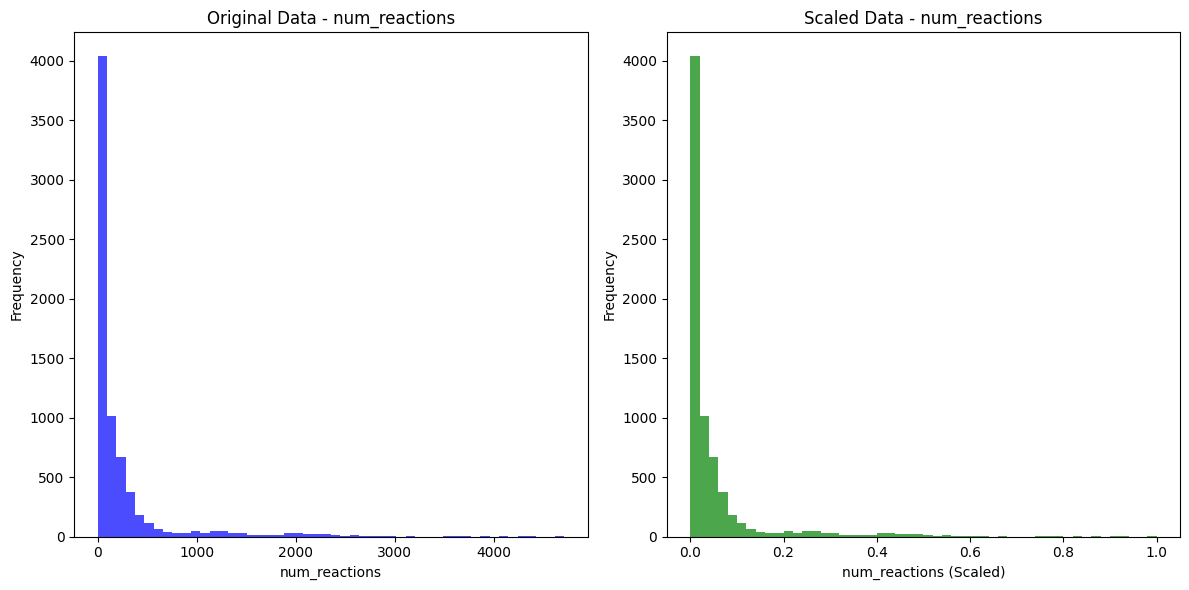

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_df)


scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)


print(scaled_df.head())


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
numeric_df['num_reactions'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title("Original Data - num_reactions")
plt.xlabel('num_reactions')


plt.subplot(1, 2, 2)
scaled_df['num_reactions'].plot(kind='hist', bins=50, color='green', alpha=0.7)
plt.title("Scaled Data - num_reactions")
plt.xlabel('num_reactions (Scaled)')

plt.tight_layout()
plt.show()

In [17]:
x=df
print(x)

                              status_id  status_type  num_reactions  \
0      246675545449582_1649696485147474            3            529   
1      246675545449582_1649426988507757            1            150   
2      246675545449582_1648730588577397            3            227   
3      246675545449582_1648576705259452            1            111   
4      246675545449582_1645700502213739            1            213   
...                                 ...          ...            ...   
7045  1050855161656896_1061863470556065            1             89   
7046  1050855161656896_1061334757275603            1             16   
7047  1050855161656896_1060126464063099            1              2   
7048  1050855161656896_1058663487542730            1            351   
7049  1050855161656896_1050858841656528            1             17   

      num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
0              512         262        432         92         3        

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

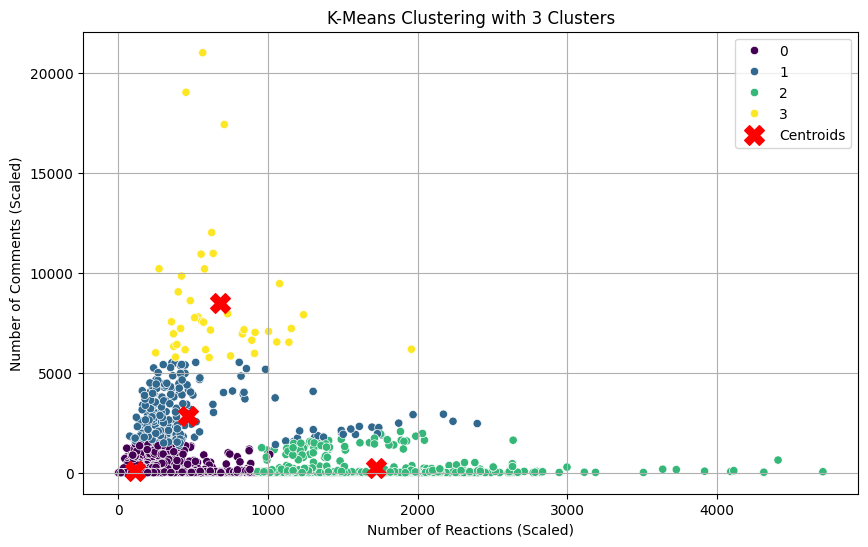

In [19]:

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # You can adjust n_clusters
kmeans.fit(X)
df['Cluster'] = kmeans.labels_ # Add cluster labels to the original dataframe
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_reactions', y='num_comments', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering with 3 Clusters')  # Updated title
plt.xlabel('Number of Reactions (Scaled)')
plt.ylabel('Number of Comments (Scaled)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', color='red', label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

## Below are generated by Claude 3.7 Sonnet

## Data Visualization

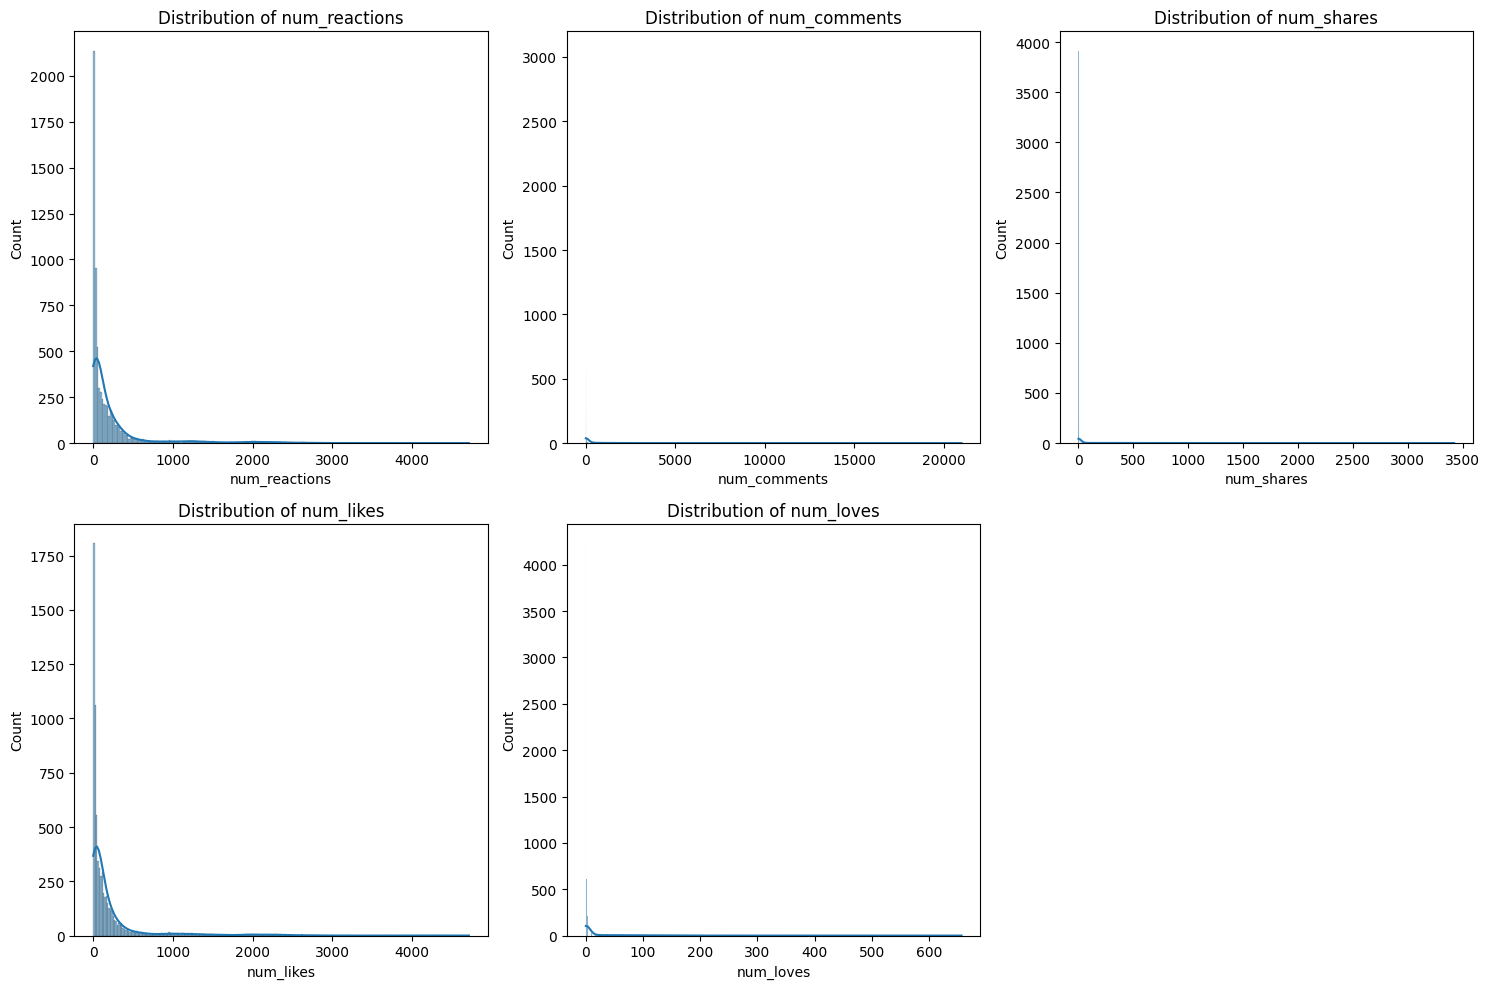

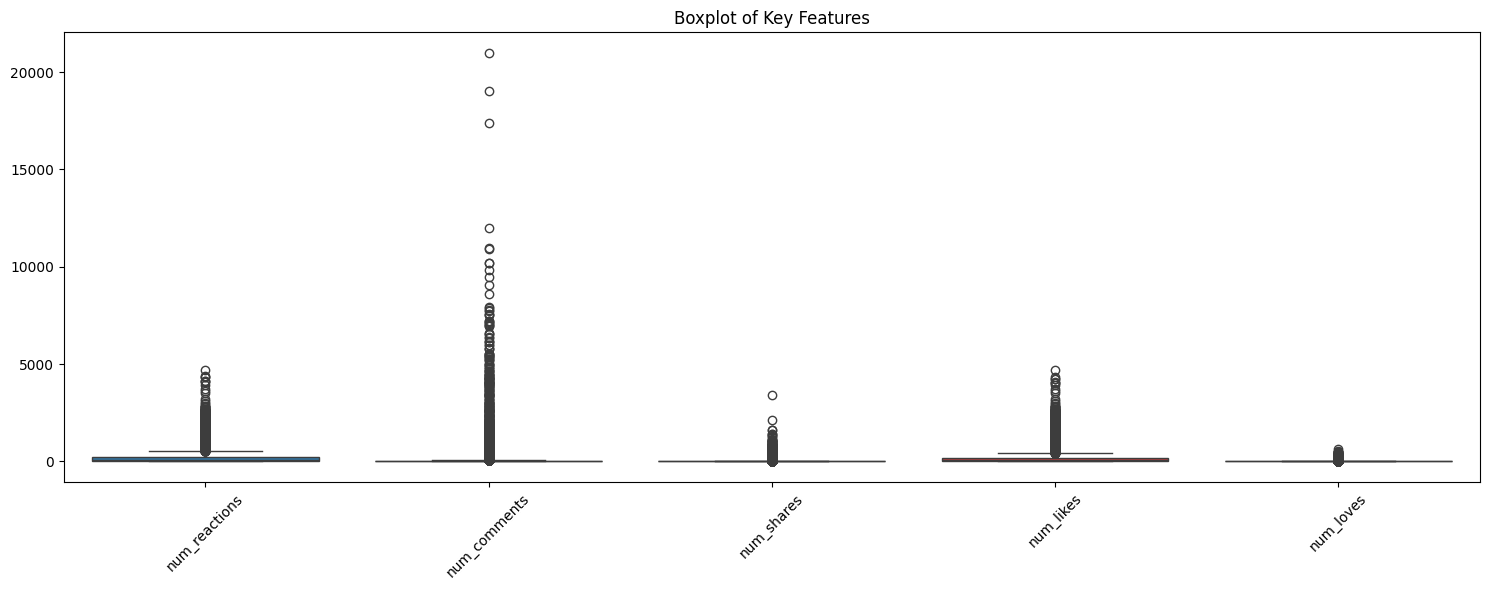

In [6]:
# Select relevant columns for visualization
cols_to_plot = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']

# Create histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Create boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title('Boxplot of Key Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Selection for K-Means

In [7]:
# Select features for clustering
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']
X = df[features].copy()

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features shape:", X_scaled.shape)

Scaled features shape: (7050, 5)


## Determining Optimal Number of Clusters (Elbow Method)

C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateP

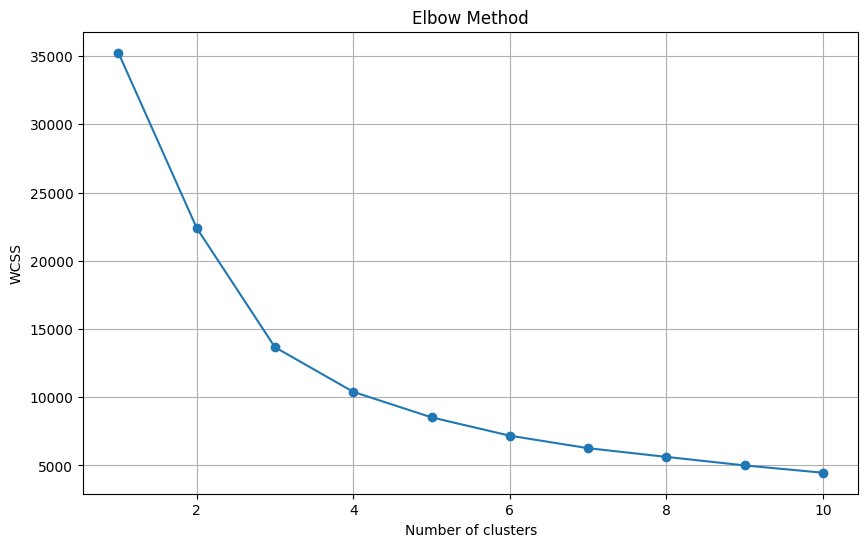

In [8]:
from sklearn.cluster import KMeans

# Calculate WCSS (Within-Cluster Sum of Square) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## K-Means Clustering

In [9]:
# Based on the elbow method, choose the optimal number of clusters
# Let's assume it's 3 (you should adjust this based on your elbow plot)
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                              columns=features)
print("Cluster Centers:")
cluster_centers

Cluster Centers:


,num_reactions,num_comments,num_shares,num_likes,num_loves
0,112.051460,85.330229,17.784530,104.527230,6.368272
1,683.665698,2960.383721,480.305233,519.488372,140.267442
2,1825.603774,61.377358,11.506739,1819.865229,3.078167


## Visualizing the Clusters

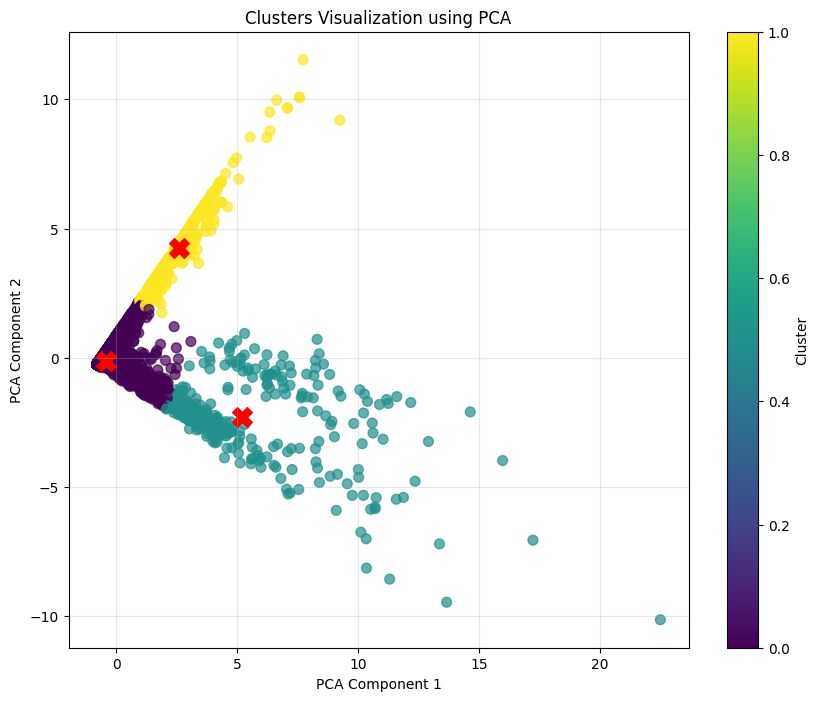

In [10]:
# Visualize clusters (using PCA to reduce to 2D for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X')
plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

## Analyzing Clusters

Cluster Analysis:


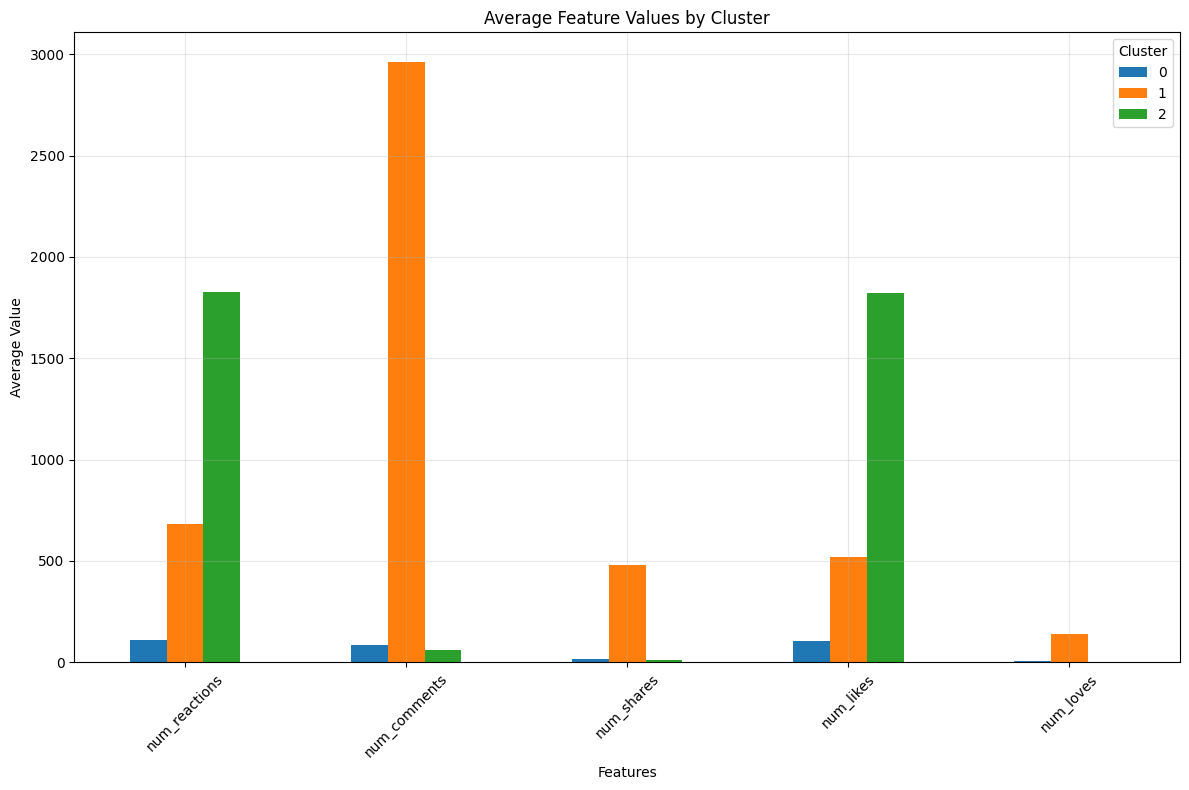

In [11]:
# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('cluster')[features].mean()
print("Cluster Analysis:")
cluster_analysis

# Visualize the cluster profiles
plt.figure(figsize=(12, 8))
cluster_analysis.T.plot(kind='bar', ax=plt.gca())
plt.title('Average Feature Values by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Silhouette Score Analysis

Silhouette Score: 0.7981
For n_clusters = 2, the silhouette score is 0.7861
For n_clusters = 3, the silhouette score is 0.7981
For n_clusters = 4, the silhouette score is 0.7581
For n_clusters = 5, the silhouette score is 0.7519
For n_clusters = 6, the silhouette score is 0.7457
For n_clusters = 7, the silhouette score is 0.7370
For n_clusters = 8, the silhouette score is 0.7455
For n_clusters = 9, the silhouette score is 0.6534
For n_clusters = 10, the silhouette score is 0.6600


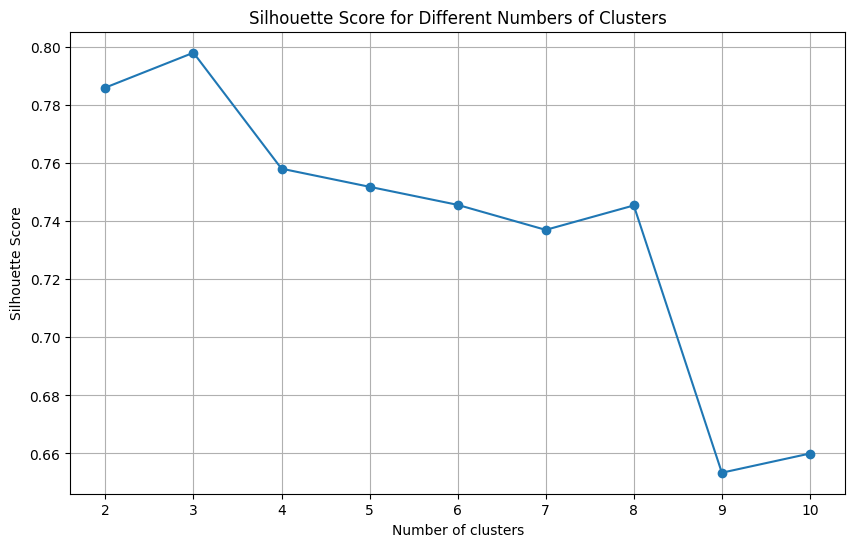

In [12]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()